## Exercise Overview
In this exercise we will play with Spark [Datasets & Dataframes](https://spark.apache.org/docs/latest/sql-programming-guide.html#datasets-and-dataframes), some [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), and build a couple of binary classifiaction models using [Spark ML](https://spark.apache.org/docs/latest/ml-guide.html) (with some [MLlib](https://spark.apache.org/mllib/) too). 
<br><br>
The set up and approach will not be too dissimilar to the standard type of approach you might do in [Sklearn](http://scikit-learn.org/stable/index.html). Spark has matured to the stage now where for 90% of what you need to do (when analysing tabular data) should be possible with Spark dataframes, SQL, and ML libraries. This is where this exercise is mainly trying to focus.  
<br>
Feel free to adapt this exercise to play with other datasets readily availabe in the Databricks enviornment (they are listed in a cell below). 

##### Getting Started
To get started you will need to create and attach a databricks spark cluster to this notebook. This notebook was developed on a cluster created with: 
- Databricks Runtime Version 4.0 (includes Apache Spark 2.3.0, Scala 2.11)
- Python Version 3

##### Links & References

Some useful links and references of sources used in creating this exercise:

**Note**: Right click and open as new tab!
<br>
1. [Latest Spark Docs](https://spark.apache.org/docs/latest/index.html)
1. [Databricks Homepage](https://databricks.com/)
1. [Databricks Community Edition FAQ](https://databricks.com/product/faq/community-edition)
1. [Databricks Self Paced Training](https://databricks.com/training-overview/training-self-paced)
1. [Databricks Notebook Guide](https://docs.databricks.com/user-guide/notebooks/index.html)
1. [Databricks Binary Classification Tutorial](https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html#binary-classification)

#### Get Data

Here we will pull in some sample data that is already pre-loaded onto all databricks clusters.

Feel free to adapt this notebook later to play around with a different dataset if you like (all available are listed in a cell below).

In [0]:
# display datasets already in databricks
display(dbutils.fs.ls("/databricks-datasets"))

path name size dbfs:/databricks-datasets/ databricks-datasets/ 0 dbfs:/databricks-datasets/COVID/ COVID/ 0 dbfs:/databricks-datasets/README.md README.md 976 dbfs:/databricks-datasets/Rdatasets/ Rdatasets/ 0 dbfs:/databricks-datasets/SPARK_README.md SPARK_README.md 3359 dbfs:/databricks-datasets/adult/ adult/ 0 dbfs:/databricks-datasets/airlines/ airlines/ 0 dbfs:/databricks-datasets/amazon/ amazon/ 0 dbfs:/databricks-datasets/asa/ asa/ 0 dbfs:/databricks-datasets/atlas_higgs/ atlas_higgs/ 0 dbfs:/databricks-datasets/bikeSharing/ bikeSharing/ 0 dbfs:/databricks-datasets/cctvVideos/ cctvVideos/ 0 dbfs:/databricks-datasets/credit-card-fraud/ credit-card-fraud/ 0 dbfs:/databricks-datasets/cs100/ cs100/ 0 dbfs:/databricks-datasets/cs110x/ cs110x/ 0 dbfs:/databricks-datasets/cs190/ cs190/ 0 dbfs:/databricks-datasets/data.gov/ data.gov/ 0 dbfs:/databricks-datasets/definitive-guide/ definitive-guide/ 0 dbfs:/databricks-datasets/flights/ flights/ 0 dbfs:/databricks-datasets/flower_photos/ flower_photos/ 0 dbfs:/databricks-datasets/flowers/ flowers/ 0 dbfs:/databricks-datasets/genomics/ genomics/ 0 dbfs:/databricks-datasets/hail/ hail/ 0 dbfs:/databricks-datasets/iot/ iot/ 0 dbfs:/databricks-datasets/iot-stream/ iot-stream/ 0 dbfs:/databricks-datasets/learning-spark/ learning-spark/ 0 dbfs:/databricks-datasets/learning-spark-v2/ learning-spark-v2/ 0 dbfs:/databricks-datasets/lending-club-loan-stats/ lending-club-loan-stats/ 0 dbfs:/databricks-datasets/med-images/ med-images/ 0 dbfs:/databricks-datasets/mnist-digits/ mnist-digits/ 0 dbfs:/databricks-datasets/news20.binary/ news20.binary/ 0 dbfs:/databricks-datasets/nyctaxi/ nyctaxi/ 0 dbfs:/databricks-datasets/online_retail/ online_retail/ 0 dbfs:/databricks-datasets/overlap-join/ overlap-join/ 0 dbfs:/databricks-datasets/power-plant/ power-plant/ 0 dbfs:/databricks-datasets/retail-org/ retail-org/ 0 dbfs:/databricks-datasets/rwe/ rwe/ 0 dbfs:/databricks-datasets/sai-summit-2019-sf/ sai-summit-2019-sf/ 0 dbfs:/databricks-datasets/sample_logs/ sample_logs/ 0 dbfs:/databricks-datasets/samples/ samples/ 0 dbfs:/databricks-datasets/sfo_customer_survey/ sfo_customer_survey/ 0 dbfs:/databricks-datasets/sms_spam_collection/ sms_spam_collection/ 0 dbfs:/databricks-datasets/songs/ songs/ 0 dbfs:/databricks-datasets/structured-streaming/ structured-streaming/ 0 dbfs:/databricks-datasets/timeseries/ timeseries/ 0 dbfs:/databricks-datasets/tpch/ tpch/ 0 dbfs:/databricks-datasets/weather/ weather/ 0 dbfs:/databricks-datasets/wiki/ wiki/ 0 dbfs:/databricks-datasets/wikipedia-datasets/ wikipedia-datasets/ 0 dbfs:/databricks-datasets/wine-quality/ wine-quality/ 0

Lets take a look at the '**adult**' dataset on the filesystem. This is the typical US Census data you often see online in tutorials. [Here](https://archive.ics.uci.edu/ml/datasets/adult) is the same data in the UCI repository.

_As an aside: [here](https://github.com/GoogleCloudPlatform/cloudml-samples/tree/master/census) this same dataset is used as a quickstart example for Google CLoud ML & Tensorflow Estimator API (in case youd be interested in playing with tensorflow on the same dataset as here)._

In [0]:
%fs ls databricks-datasets/adult/adult.data

path name size dbfs:/databricks-datasets/adult/adult.data adult.data 3974305

**Note**: Above  %fs is just some file system cell magic that is specific to databricks. More info [here](https://docs.databricks.com/user-guide/notebooks/index.html#mix-languages).

#### Spark SQL

Below we will use Spark SQL to load in the data and then register it as a Dataframe aswell. So the end result will be a Spark SQL table called _adult_ and a Spark Dataframe called _df_adult_. 
<br><br>
This is an example of the flexibility in Spark in that you could do lots of you ETL and data wrangling using either Spark SQL or Dataframes and pyspark. Most of the time it's a case of using whatever you are most comfortable with.
<br><br>
When you get more advanced then you might looking the pro's and con's of each and when you might favour one or the other (or operating direclty on RDD's), [here](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html) is a good article on the issues. For now, no need to overthink it!

In [0]:
%sql 
-- drop the table if it already exists
DROP TABLE IF EXISTS adult

In [0]:
%sql
-- create a new table in Spark SQL from the datasets already loaded in the underlying filesystem.
-- In the real world you might be pointing at a file on HDFS or a hive table etc. 
CREATE TABLE adult (
  age DOUBLE,
  workclass STRING,
  fnlwgt DOUBLE,
  education STRING,
  education_num DOUBLE,
  marital_status STRING,
  occupation STRING,
  relationship STRING,
  race STRING,
  sex STRING,
  capital_gain DOUBLE,
  capital_loss DOUBLE,
  hours_per_week DOUBLE,
  native_country STRING,
  income STRING)
USING com.databricks.spark.csv
OPTIONS (path "/databricks-datasets/adult/adult.data", header "true")

In [0]:
spark.sql("SELECT * FROM adult LIMIT 5").show() 

+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
 age| workclass| fnlwgt| education|education_num| marital_status| occupation| relationship| race| sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
50.0| Self-emp-not-inc| 83311.0| Bachelors| 13.0| Married-civ-spouse| Exec-managerial| Husband| White| Male| 0.0| 0.0| 13.0| United-States| <=50K|
38.0| Private|215646.0| HS-grad| 9.0| Divorced| Handlers-cleaners| Not-in-family| White| Male| 0.0| 0.0| 40.0| United-States| <=50K|
53.0| Private|234721.0| 11th| 7.0| Married-civ-spouse| Handlers-cleaners| Husband| Black| Male| 0.0| 0.0| 40.0| United-States| <=50K|
28.0| Private|338409.0| Bachelors| 13.0| Married-civ-spouse| Prof-specialty| Wife| Black| Female| 0.0| 0.0| 40.0| Cuba| <=50K|
37.0| Private|284582.0| Masters| 14.0| Married-civ-spouse| Exec-managerial| Wife| White| Female| 0.0| 0.0| 40.0| United-States| <=50K|
+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+

In [0]:
# look at the data
#spark.sql("SELECT * FROM adult LIMIT 5").show() 
# this will look prettier in Databricks if you use display() instead
display(spark.sql("SELECT * FROM adult LIMIT 5"))

age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K

If you are more comfortable with SQL then as you can see below, its very easy to just get going with writing standard SQL type code to analyse your data, do data wrangling and create new dataframes.

In [0]:
# Lets get some summary marital status rates by occupation
result = spark.sql(
  """
  SELECT 
    occupation,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) LIKE 'Married-%',1,0)),2) as married_rate,
    ROUND(AVG(if(lower(marital_status) LIKE '%widow%',1,0)),2) as widow_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Divorced',1,0)),2) as divorce_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Separated',1,0)),2) as separated_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY n DESC
  """)
display(result)

occupation n married_rate widow_rate divorce_rate separated_rate bachelor_rate Prof-specialty 4140 0.53 0.02 0.13 0.02 0.3 Craft-repair 4099 0.64 0.01 0.11 0.03 0.21 Exec-managerial 4066 0.61 0.02 0.15 0.02 0.2 Adm-clerical 3769 0.28 0.04 0.22 0.04 0.42 Sales 3650 0.47 0.03 0.12 0.03 0.36 Other-service 3295 0.24 0.05 0.15 0.06 0.5 Machine-op-inspct 2002 0.51 0.03 0.14 0.04 0.29 ? 1843 0.36 0.08 0.1 0.04 0.42 Transport-moving 1597 0.63 0.02 0.11 0.02 0.21 Handlers-cleaners 1370 0.36 0.01 0.09 0.03 0.51 Farming-fishing 994 0.6 0.02 0.06 0.02 0.29 Tech-support 928 0.44 0.02 0.15 0.03 0.36 Protective-serv 649 0.6 0.01 0.12 0.02 0.24 Priv-house-serv 149 0.13 0.15 0.19 0.08 0.45 Armed-Forces 9 0.33 0.0 0.0 0.0 0.67

You can easily register dataframes as a table for Spark SQL too. So this way you can easily move between Dataframes and Spark SQL for whatever reason.

In [0]:
# register the df we just made as a table for spark sql
sqlContext.registerDataFrameAsTable(result, "result")
spark.sql("SELECT * FROM result").show(5)

+----------------+----+------------+----------+------------+--------------+-------------+
 occupation| n|married_rate|widow_rate|divorce_rate|separated_rate|bachelor_rate|
+----------------+----+------------+----------+------------+--------------+-------------+
 Prof-specialty|4140| 0.53| 0.02| 0.13| 0.02| 0.3|
 Craft-repair|4099| 0.64| 0.01| 0.11| 0.03| 0.21|
 Exec-managerial|4066| 0.61| 0.02| 0.15| 0.02| 0.2|
 Adm-clerical|3769| 0.28| 0.04| 0.22| 0.04| 0.42|
 Sales|3650| 0.47| 0.03| 0.12| 0.03| 0.36|
+----------------+----+------------+----------+------------+--------------+-------------+
only showing top 5 rows

In [0]:
display(spark.sql("SELECT * FROM result LIMIT 5"))

occupation n married_rate widow_rate divorce_rate separated_rate bachelor_rate Prof-specialty 4140 0.53 0.02 0.13 0.02 0.3 Craft-repair 4099 0.64 0.01 0.11 0.03 0.21 Exec-managerial 4066 0.61 0.02 0.15 0.02 0.2 Adm-clerical 3769 0.28 0.04 0.22 0.04 0.42 Sales 3650 0.47 0.03 0.12 0.03 0.36

#### <span style="color:darkblue">Question 1</span>

1. Write some spark sql to get the top 'bachelor_rate' by 'education' group?

In [0]:
### Question 1.1 Answer ###
result1 = spark.sql(
  """
  SELECT 
    education,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 3 DESC
  """)
display(result1)

education n bachelor_rate 12th 433 0.54 11th 1175 0.5 Preschool 51 0.43 Some-college 7291 0.4 10th 933 0.39 Bachelors 5354 0.34 Assoc-acdm 1067 0.32 9th 514 0.3 HS-grad 10501 0.29 5th-6th 333 0.27 Assoc-voc 1382 0.26 Masters 1723 0.23 1st-4th 168 0.23 Doctorate 413 0.18 7th-8th 646 0.17 Prof-school 576 0.16

#### Spark DataFrames

Below we will create our DataFrame from the SQL table and do some similar analysis as we did with Spark SQL but using the DataFrames API.

In [0]:
# register a df from the sql df
df_adult = spark.table("adult")
cols = df_adult.columns # this will be used much later in the notebook, ignore for now

In [0]:
# look at df schema
df_adult.printSchema()

root
-- age: double (nullable = true)
-- workclass: string (nullable = true)
-- fnlwgt: double (nullable = true)
-- education: string (nullable = true)
-- education_num: double (nullable = true)
-- marital_status: string (nullable = true)
-- occupation: string (nullable = true)
-- relationship: string (nullable = true)
-- race: string (nullable = true)
-- sex: string (nullable = true)
-- capital_gain: double (nullable = true)
-- capital_loss: double (nullable = true)
-- hours_per_week: double (nullable = true)
-- native_country: string (nullable = true)
-- income: string (nullable = true)

In [0]:
# look at the df
display(df_adult)
#df_adult.show(5)

age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K 49.0 Private 160187.0 9th 5.0 Married-spouse-absent Other-service Not-in-family Black Female 0.0 0.0 16.0 Jamaica <=50K 52.0 Self-emp-not-inc 209642.0 HS-grad 9.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 45.0 United-States >50K 31.0 Private 45781.0 Masters 14.0 Never-married Prof-specialty Not-in-family White Female 14084.0 0.0 50.0 United-States >50K 42.0 Private 159449.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 5178.0 0.0 40.0 United-States >50K 37.0 Private 280464.0 Some-college 10.0 Married-civ-spouse Exec-managerial Husband Black Male 0.0 0.0 80.0 United-States >50K 30.0 State-gov 141297.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Husband Asian-Pac-Islander Male 0.0 0.0 40.0 India >50K 23.0 Private 122272.0 Bachelors 13.0 Never-married Adm-clerical Own-child White Female 0.0 0.0 30.0 United-States <=50K 32.0 Private 205019.0 Assoc-acdm 12.0 Never-married Sales Not-in-family Black Male 0.0 0.0 50.0 United-States <=50K 40.0 Private 121772.0 Assoc-voc 11.0 Married-civ-spouse Craft-repair Husband Asian-Pac-Islander Male 0.0 0.0 40.0 ? >50K 34.0 Private 245487.0 7th-8th 4.0 Married-civ-spouse Transport-moving Husband Amer-Indian-Eskimo Male 0.0 0.0 45.0 Mexico <=50K 25.0 Self-emp-not-inc 176756.0 HS-grad 9.0 Never-married Farming-fishing Own-child White Male 0.0 0.0 35.0 United-States <=50K 32.0 Private 186824.0 HS-grad 9.0 Never-married Machine-op-inspct Unmarried White Male 0.0 0.0 40.0 United-States <=50K 38.0 Private 28887.0 11th 7.0 Married-civ-spouse Sales Husband White Male 0.0 0.0 50.0 United-States <=50K 43.0 Self-emp-not-inc 292175.0 Masters 14.0 Divorced Exec-managerial Unmarried White Female 0.0 0.0 45.0 United-States >50K 40.0 Private 193524.0 Doctorate 16.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States >50K 54.0 Private 302146.0 HS-grad 9.0 Separated Other-service Unmarried Black Female 0.0 0.0 20.0 United-States <=50K 35.0 Federal-gov 76845.0 9th 5.0 Married-civ-spouse Farming-fishing Husband Black Male 0.0 0.0 40.0 United-States <=50K 43.0 Private 117037.0 11th 7.0 Married-civ-spouse Transport-moving Husband White Male 0.0 2042.0 40.0 United-States <=50K 59.0 Private 109015.0 HS-grad 9.0 Divorced Tech-support Unmarried White Female 0.0 0.0 40.0 United-States <=50K 56.0 Local-gov 216851.0 Bachelors 13.0 Married-civ-spouse Tech-support Husband White Male 0.0 0.0 40.0 United-States >50K 19.0 Private 168294.0 HS-grad 9.0 Never-married Craft-repair Own-child White Male 0.0 0.0 40.0 United-States <=50K 54.0 ? 180211.0 Some-college 10.0 Married-civ-spouse ? Husband Asian-Pac-Islander Male 0.0 0.0 60.0 South >50K 39.0 Private 367260.0 HS-grad 9.0 Divorced Exec-managerial Not-in-family White Male 0.0 0.0 80.0 United-States <=50K 49.0 Private 193366.0 HS-grad 9.0 Married-civ-spouse Craft-repair Husband White Male 0.0 0.0 40.0 United-States <=50K 23.0 Local-gov 190709.0 Assoc-acdm 12.0 Never-married Protective-serv Not-in-family White Male 0.0 0.0 52.0 United-States <=50K 20.0 Private 266015.0 Some-college 10.0 Never-married Sales Own-child Black Male 0.0 0.0 44.0 United-States <=50K 45.0 Private 386940.0 Bachelors 13.0 Divorced Exec-managerial Own-child White Male 0.0 1408.0 40.0 United

Below we will do a similar calculation to what we did above but using the DataFrames API

In [0]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['occupation'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Divorced' , 1 ).otherwise(0).alias('is_divorced')
)
# do grouping (and a round)
df_result = df_result.groupBy('occupation').agg(round(mean('is_divorced'),2).alias('divorced_rate'))
# do ordering
df_result = df_result.orderBy(desc('divorced_rate'))
# show results
df_result.show(5)

+----------------+-------------+
 occupation|divorced_rate|
+----------------+-------------+
 Adm-clerical| 0.22|
 Priv-house-serv| 0.19|
 Tech-support| 0.15|
 Exec-managerial| 0.15|
 Other-service| 0.15|
+----------------+-------------+
only showing top 5 rows

As you can see the dataframes api is a bit more verbose then just expressing what you want to do in standard SQL.<br><br>But some prefer it and might be more used to it, and there could be cases where expressing what you need to do might just be better using the DataFrame API if it is too complicated for a simple SQL expression for example of maybe involves recursion of some type.

#### <span style="color:darkblue">Question 2</span>
1. Write some pyspark to get the top 'bachelor_rate' by 'education' group using DataFrame operations?

In [0]:
### Question 2.1 Answer ###

# wrangle the data a bit
# wrangle the data a bit
df_result1 = df_adult.select(
  df_adult['education'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Never-married' , 1 ).otherwise(0).alias('bachelor')
)
# do grouping (and a round)
df_result1 = df_result1.groupBy('education').agg(round(mean('bachelor'),2).alias('bachelor_rate'))
# do ordering
df_result1 = df_result1.orderBy(desc('bachelor_rate'))
# show results
df_result1.show(5)

+-------------+-------------+
 education|bachelor_rate|
+-------------+-------------+
 12th| 0.54|
 11th| 0.5|
 Preschool| 0.43|
 Some-college| 0.4|
 10th| 0.39|
+-------------+-------------+
only showing top 5 rows

#### Explore & Visualize Data

It's very easy to [collect()](https://spark.apache.org/docs/latest/rdd-programming-guide.html#printing-elements-of-an-rdd) your Spark DataFrame data into a Pandas df and then continue to analyse or plot as you might normally.
<br><br>
Obviously if you try to collect() a huge DataFrame then you will run into issues, so usually you would only collect aggregated or sampled data into a Pandas df.

In [0]:
import pandas as pd

# do some analysis
result = spark.sql(
  """
  SELECT 
    occupation,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

# collect results into a pandas df
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas.head())

occupation plus_50k
0 Exec-managerial 0.484014
1 Prof-specialty 0.449034
2 Protective-serv 0.325116
3 Tech-support 0.304957
4 Sales 0.269315

In [0]:
print(df_pandas.describe())

plus_50k
count 15.000000
mean 0.197357
std 0.143993
min 0.006711
25% 0.107373
50% 0.134518
75% 0.287136
max 0.484014

In [0]:
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 occupation 15 non-null object 
 1 plus_50k 15 non-null float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes
None

Here we will just do some very basic plotting to show how you might collect what you are interested in into a Pandas DF and then just plot any way you normally would.

For simplicity we are going to use the plotting functionality built into pandas (you could make this a pretty as you want).

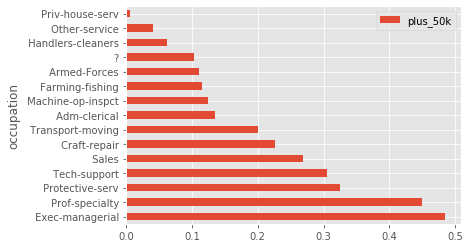

In [0]:
import matplotlib.pyplot as plt

# i like ggplot style
plt.style.use('ggplot')

# get simple plot on the pandas data
myplot = df_pandas.plot(kind='barh', x='occupation', y='plus_50k')

# display the plot (note - display() is a databricks function - 
# more info on plotting in Databricks is here: https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html)
display(myplot.figure)

You can also easily get summary stats on a Spark DataFrame like below. [Here](https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html) is a nice blog post that has more examples.<br><br>So this is an example of why you might want to move from Spark SQL into DataFrames API as being able to just call describe() on the Spark DF is easier then trying to do the equivilant in Spark SQL.

In [0]:
# describe df
df_adult.select(df_adult['age'],df_adult['education_num']).describe().show()

+-------+------------------+------------------+
summary| age| education_num|
+-------+------------------+------------------+
 count| 32560| 32560|
 mean|38.581633906633904| 10.08058968058968|
 stddev|13.640641827464002|2.5727089681052058|
 min| 17.0| 1.0|
 max| 90.0| 16.0|
+-------+------------------+------------------+

### ML Pipeline - Logistic Regression vs Random Forest

Below we will create two [Spark ML Pipelines](https://spark.apache.org/docs/latest/ml-pipeline.html) - one that fits a logistic regression and one that fits a random forest. We will then compare the performance of each.

**Note**: A lot of the code below is adapted from [this example](https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html).

In [0]:
sc.version


Out[18]: '3.0.1'

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
stages = [] # stages in our Pipeline



for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoder(dropLast=False,inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [0]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="income", outputCol="label")
stages += [label_stringIdx]

In [0]:
# Transform all features into a vector using VectorAssembler
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
# Run the feature transformations.
#  - fit() computes feature statistics as needed.
#  - transform() actually transforms the features.
pipelineModel = pipeline.fit(df_adult)
dataset = pipelineModel.transform(df_adult)
# Keep relevant columns
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 0.0 List(0, 108, List(1, 11, 25, 34, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 83311.0, 13.0, 13.0)) 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 0.0 List(0, 108, List(0, 9, 27, 41, 48, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 38.0, 215646.0, 9.0, 40.0)) 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 0.0 List(0, 108, List(0, 14, 25, 41, 47, 54, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 53.0, 234721.0, 7.0, 40.0)) 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 0.0 List(0, 108, List(0, 11, 25, 32, 51, 54, 59, 69, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 28.0, 338409.0, 13.0, 40.0)) 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 0.0 List(0, 108, List(0, 12, 25, 34, 51, 53, 59, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 284582.0, 14.0, 40.0)) 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K 0.0 List(0, 108, List(0, 19, 30, 37, 48, 54, 59, 71, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 49.0, 160187.0, 5.0, 16.0)) 49.0 Private 160187.0 9th 5.0 Married-spouse-absent Other-service Not-in-family Black Female 0.0 0.0 16.0 Jamaica <=50K 1.0 List(0, 108, List(1, 9, 25, 34, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 52.0, 209642.0, 9.0, 45.0)) 52.0 Self-emp-not-inc 209642.0 HS-grad 9.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 45.0 United-States >50K 1.0 List(0, 108, List(0, 12, 26, 32, 48, 53, 59, 60, 102, 103, 104, 105, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 31.0, 45781.0, 14.0, 14084.0, 50.0)) 31.0 Private 45781.0 Masters 14.0 Never-married Prof-specialty Not-in-family White Female 14084.0 0.0 50.0 United-States >50K 1.0 List(0, 108, List(0, 11, 25, 34, 47, 53, 58, 60, 102, 103, 104, 105, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 42.0, 159449.0, 13.0, 5178.0, 40.0)) 42.0 Private 159449.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 5178.0 0.0 40.0 United-States >50K 1.0 List(0, 108, List(0, 10, 25, 34, 47, 54, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 280464.0, 10.0, 80.0)) 37.0 Private 280464.0 Some-college 10.0 Married-civ-spouse Exec-managerial Husband Black Male 0.0 0.0 80.0 United-States >50K 1.0 List(0, 108, List(4, 11, 25, 32, 47, 55, 58, 68, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0, 141297.0, 13.0, 40.0)) 30.0 State-gov 141297.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Husband Asian-Pac-Islander Male 0.0 0.0 40.0 India >50K 0.0 List(0, 108, List(0, 11, 26, 35, 49, 53, 59, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 23.0, 122272.0, 13.0, 30.0)) 23.0 Private 122272.0 Bachelors 13.0 Never-married Adm-clerical Own-child White Female 0.0 0.0 30.0 United-States <=50K 0.0 List(0, 108, List(0, 15, 26, 36, 48, 54, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 205019.0, 12.0, 50.0)) 32.0 Private 205019.0 Assoc-acdm 12.0 Never-married Sales Not-in-family Black Male 0.0 0.0 50.0 United-States <=50K 1.0 List(0, 108, List(0, 13, 25, 33, 47, 55, 58, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 40.0, 121772.0, 11.0, 40.0)) 40.0 Private 121772.0 Assoc-voc 11.0 Married-civ-spouse Craft-repair Husband Asian-Pac-Islander Male 0.0 0.0 40.0 ? >50K 0.0 List(0, 108, Lis

In [0]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)
print(trainingData.count())
print(testData.count())

22831
9729

In [0]:
from pyspark.sql.functions import avg

# get the rate of the positive outcome from the training data to use as a threshold in the model
training_data_positive_rate = trainingData.select(avg(trainingData['label'])).collect()[0][0] 

print("Positive rate in the training data is {}".format(training_data_positive_rate))

Positive rate in the training data is 0.2398931277648811

#### Logistic Regression - Train

In [0]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# set threshold for the probability above which to predict a 1
lr.setThreshold(training_data_positive_rate)
# lr.setThreshold(0.5) # could use this if knew you had balanced data

# Train model with Training Data
lrModel = lr.fit(trainingData)

# get training summary used for eval metrics and other params
lrTrainingSummary = lrModel.summary

# Find the best model threshold if you would like to use that instead of the empirical positve rate
fMeasure = lrTrainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
lrBestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
  
print("Best threshold based on model performance on training data is {}".format(lrBestThreshold))

Best threshold based on model performance on training data is 0.32327998906393024

#### GBM - Train

#### <span style="color:darkblue">Question 3</span>
1. Train a GBTClassifier on the training data, call the trained model 'gbModel'

In [0]:
### Question 3.1 Answer ###

# Create initial LogisticRegression model
gb = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
gbModel = gb.fit(trainingData)

#### Logistic Regression - Predict

In [0]:
# make predictions on test data
lrPredictions = lrModel.transform(testData)

# display predictions
display(lrPredictions.select("label", "prediction", "probability"))
#display(lrPredictions)

label prediction probability 0.0 1.0 List(1, 2, List(), List(0.14534288150886873, 0.8546571184911312)) 0.0 1.0 List(1, 2, List(), List(0.692282982051793, 0.3077170179482071)) 0.0 1.0 List(1, 2, List(), List(0.48815356680317445, 0.5118464331968255)) 0.0 1.0 List(1, 2, List(), List(0.6715552604867142, 0.3284447395132859)) 0.0 1.0 List(1, 2, List(), List(0.6007978735955035, 0.39920212640449654)) 0.0 1.0 List(1, 2, List(), List(0.5987973822004475, 0.40120261779955235)) 0.0 1.0 List(1, 2, List(), List(0.5893555300501392, 0.4106444699498608)) 0.0 1.0 List(1, 2, List(), List(0.5890441074833717, 0.41095589251662834)) 0.0 1.0 List(1, 2, List(), List(0.757591812114384, 0.24240818788561602)) 0.0 0.0 List(1, 2, List(), List(0.9903136157039081, 0.009686384296091893)) 0.0 1.0 List(1, 2, List(), List(0.41786712427413264, 0.5821328757258674)) 0.0 1.0 List(1, 2, List(), List(0.4687702860633203, 0.5312297139366797)) 0.0 1.0 List(1, 2, List(), List(0.5354843459796708, 0.46451565402032924)) 0.0 1.0 List(1, 2, List(), List(0.7204153693952524, 0.2795846306047475)) 0.0 1.0 List(1, 2, List(), List(0.6299121211536386, 0.37008787884636146)) 0.0 1.0 List(1, 2, List(), List(0.7163766576708114, 0.2836233423291886)) 0.0 1.0 List(1, 2, List(), List(0.5665405805523827, 0.4334594194476173)) 0.0 1.0 List(1, 2, List(), List(0.4348172914866424, 0.5651827085133576)) 0.0 1.0 List(1, 2, List(), List(0.5320060981958912, 0.46799390180410877)) 0.0 1.0 List(1, 2, List(), List(0.39845960991721946, 0.6015403900827806)) 0.0 1.0 List(1, 2, List(), List(0.5909424676951669, 0.40905753230483305)) 0.0 1.0 List(1, 2, List(), List(0.6005734098092408, 0.39942659019075927)) 0.0 1.0 List(1, 2, List(), List(0.5453572212580173, 0.4546427787419826)) 0.0 1.0 List(1, 2, List(), List(0.37701892965145445, 0.6229810703485456)) 0.0 1.0 List(1, 2, List(), List(0.2748826263304031, 0.7251173736695968)) 0.0 1.0 List(1, 2, List(), List(0.4540381785273365, 0.5459618214726635)) 0.0 0.0 List(1, 2, List(), List(0.8648387190282184, 0.13516128097178162)) 0.0 0.0 List(1, 2, List(), List(0.8327347162918164, 0.1672652837081836)) 0.0 0.0 List(1, 2, List(), List(0.8655207386267236, 0.1344792613732764)) 0.0 0.0 List(1, 2, List(), List(0.8077105620983523, 0.19228943790164774)) 0.0 0.0 List(1, 2, List(), List(0.8306355006749504, 0.16936449932504952)) 0.0 0.0 List(1, 2, List(), List(0.8150249315808871, 0.1849750684191129)) 0.0 0.0 List(1, 2, List(), List(0.7752318490992827, 0.2247681509007174)) 0.0 1.0 List(1, 2, List(), List(0.7572137646910007, 0.24278623530899932)) 0.0 0.0 List(1, 2, List(), List(0.7915858383428424, 0.20841416165715762)) 0.0 0.0 List(1, 2, List(), List(0.8010436023753083, 0.19895639762469183)) 0.0 0.0 List(1, 2, List(), List(0.8329055666714319, 0.1670944333285681)) 0.0 0.0 List(1, 2, List(), List(0.807861675143156, 0.19213832485684404)) 0.0 1.0 List(1, 2, List(), List(0.7493066735657149, 0.25069332643428516)) 0.0 0.0 List(1, 2, List(), List(0.7959478730330267, 0.20405212696697325)) 0.0 0.0 List(1, 2, List(), List(0.7925383130079198, 0.20746168699208012)) 0.0 1.0 List(1, 2, List(), List(0.7344955707171639, 0.26550442928283613)) 0.0 1.0 List(1, 2, List(), List(0.7574701918046315, 0.24252980819536846)) 0.0 0.0 List(1, 2, List(), List(0.7986162600340521, 0.20138373996594788)) 0.0 1.0 List(1, 2, List(), List(0.7369870390871184, 0.2630129609128816)) 0.0 0.0 List(1, 2, List(), List(0.7965126228192647, 0.20348737718073523)) 0.0 0.0 List(1, 2, List(), List(0.7923522280477368, 0.20764777195226328)) 0.0 1.0 List(1, 2, List(), List(0.7518547772047178, 0.24814522279528226)) 0.0 1.0 List(1, 2, List(), List(0.7154151811327198, 0.28458481886728004)) 0.0 0.0 List(1, 2, List(), List(0.7758841029978326, 0.22411589700216733)) 0.0 1.0 List(1, 2, List(), List(0.7274043974568084, 0.2725956025431916)) 0.0 0.0 List(1, 2, List(), List(0.7878967357148938, 0.21210326428510615)) 0.0 1.0 List(1, 2, List(), List(0.7364466850676409, 0.2635533149323591)) 0.0 1.0 List(1, 2, List(), List(0.7188863770369933, 0.2811136229630067

### GBM - Predict

#### <span style="color:darkblue">Question 4</span>
1. Get predictions on the test data for your GBTClassifier. Call the predictions df 'gbPredictions'.

In [0]:
### Question 4.1 Answer ###

# make predictions on test data
gbPredictions = gbModel.transform(testData)

display(gbPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 106, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K List(1, 2, List(), List(-1.7716047065194025, 1.7716047065194025)) List(1, 2, List(), List(0.14534288150886873, 0.8546571184911312)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.8108142178803466, -0.8108142178803466)) List(1, 2, List(), List(0.692282982051793, 0.3077170179482071)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K List(1, 2, List(), List(-0.0473946024655616, 0.0473946024655616)) List(1, 2, List(), List(0.48815356680317445, 0.5118464331968255)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.7152277035609056, -0.7152277035609056)) List(1, 2, List(), List(0.6715552604867142, 0.3284447395132859)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K List(1, 2, List(), List(0.408790690067526, -0.408790690067526)) List(1, 2, List(), List(0.6007978735955035, 0.39920212640449654)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.4004566998025758, -0.4004566998025758)) List(1, 2, List(), List(0.5987973822004475, 0.40120261779955235)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.36130181441462117, -0.36130181441462117)) List(1, 2, List(), List(0.5893555300501392, 0.4106444699498608)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 30.0 United-States <=50K List(1, 2, List(), List(0.360015174959055, -0.360015174959055)) List(1, 2, List(), List(0.5890441074833717, 0.41095589251662834)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 34.0, 241360.0, 9.0, 40.0)) 34.0 Private 241360.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 ? <=50K List(1, 2, List(), List(1.1395217021196087, -1.1395217021196087)) List(1, 2, List(), List(0.757591812114384, 0.24240818788561602)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 49, 53, 59, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 20.0, 219266.0, 9.0, 36.0)) 20.0 Private 219266.0 HS-grad 9.0 Mar

#### Logistic Regression - Evaluate

#### <span style="color:darkblue">Question 5</span>

1. Complete the print_performance_metrics() function below to also include measures of F1, Precision, Recall, False Positive Rate and True Positive Rate.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

def print_performance_metrics(predictions):
  # Evaluate model
  evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
  auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
  aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
  print("auc = {}".format(auc))
  print("aupr = {}".format(aupr))

  # get rdd of predictions and labels for mllib eval metrics 
  predictionAndLabels = predictions.select("prediction","label").rdd
  

  # Instantiate metrics objects
  binary_metrics = BinaryClassificationMetrics(predictionAndLabels)
  multi_metrics = MulticlassMetrics(predictionAndLabels)

  # Area under precision-recall curve
  print("Area under PR = {}".format(binary_metrics.areaUnderPR))
  # Area under ROC curve
  print("Area under ROC = {}".format(binary_metrics.areaUnderROC))
  # Accuracy
  print("Accuracy = {}".format(multi_metrics.accuracy))
  # Confusion Matrix
  print(multi_metrics.confusionMatrix())
  
  ### Question 5.1 Answer ###
  
  # F1
  print("F1 = {}".format(multi_metrics.fMeasure(0.0)))
  # Precision
  print("Precision = {}".format(multi_metrics.precision(0.0)))
  # Recall
  print("Recall = {}".format(multi_metrics.recall(0.0)))
  # FPR
  print("FPR = {}".format(multi_metrics.falsePositiveRate(0.0)))
  # TPR
  print("TPR = {}".format(multi_metrics.truePositiveRate(0.0)))
  
  
print_performance_metrics(lrPredictions)

auc = 0.8990390480424371
aupr = 0.7549772154296988
Area under PR = 0.5392747731762145
Area under ROC = 0.817405774327058
Accuracy = 0.8037825059101655
DenseMatrix([[5825., 1540.],
 [ 369., 1995.]])
F1 = 0.859207906187772
Precision = 0.940426218921537
Recall = 0.7909029192124916
FPR = 0.15609137055837563
TPR = 0.7909029192124916

#### GBM - Evaluate

In [0]:
print_performance_metrics(gbPredictions)

auc = 0.8990390480424371
aupr = 0.7549772154296988
Area under PR = 0.6218977984704164
Area under ROC = 0.7555498981670061
Accuracy = 0.844074416692363
DenseMatrix([[6833., 532.],
 [ 985., 1379.]])
F1 = 0.9000856220773232
Precision = 0.8740086978766948
Recall = 0.9277664630006789
FPR = 0.4166666666666667
TPR = 0.9277664630006789

## Cross Validation

For each model you can run the below comand to see its params and a brief explanation of each.

In [0]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal with 1 for binomial regression, or the number oflasses for multinomial regression. (undefined)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw prediction (a.k.a. confidence) column name. (default: rawPrediction)
regParam: regularization parameter (>= 0). (default: 0.0)
standardization: whether to standardize the training features before fitting the model. (default: True)
threshold: Threshold in binary classification prediction, in range [0, 1]. If threshold and thresholds are both set, they must match.e.g. if threshold is p, then thresholds must be equal to [1-p, p]. (default: 0.5, current: 0.2398931277648811)
thresholds: Thresholds in multi-class classification to adjust the probability of predicting each class. Array must have length equal to the number of classes, with values > 0, excepting that at most one value may be 0. The class with largest value p/t is predicted, where p is the original probability of that class and t is the class's threshold. (undefined)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 1e-06)
upperBoundsOnCoefficients: The upper bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
upperBoundsOnIntercepts: The upper bounds on intercepts if fitting under bound constrained optimization. The bound vector size must be equal with 1 for binomial regression, or the number of classes for multinomial regression. (undefined)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)

In [0]:
print(gb.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal with 1 for binomial regression, or the number oflasses for multinomial regression. (undefined)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw prediction (a.k.a. confidence) column name. (default: rawPrediction)
regParam: regularization parameter (>= 0). (default: 0.0)
standardization: whether to standardize the training features before fitting the model. (default: True)
threshold: Threshold in binary classification prediction, in range [0, 1]. If threshold and thresholds are both set, they must match.e.g. if threshold is p, then thresholds must be equal to [1-p, p]. (default: 0.5)
thresholds: Thresholds in multi-class classification to adjust the probability of predicting each class. Array must have length equal to the number of classes, with values > 0, excepting that at most one value may be 0. The class with largest value p/t is predicted, where p is the original probability of that class and t is the class's threshold. (undefined)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 1e-06)
upperBoundsOnCoefficients: The upper bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
upperBoundsOnIntercepts: The upper bounds on intercepts if fitting under bound constrained optimization. The bound vector size must be equal with 1 for binomial regression, or the number of classes for multinomial regression. (undefined)
weightCol: weight column name. If this is not set or empty, we treat all instance weights as 1.0. (undefined)

#### Logisitic Regression - Param Grid

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
lrParamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [2, 5])
             .build())

#### GBM - Param Grid

#### <span style="color:darkblue">Question 6</span>

1. Build out a param grid for the gb model, call it 'gbParamGrid'.

In [0]:
### Question 6.1 Answer ###

# Create ParamGrid for Cross Validation
gbParamGrid = (ParamGridBuilder()
             .addGrid(gb.regParam, [0.01, 0.5, 2.0])
             .addGrid(gb.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(gb.maxIter, [2, 5])
             .build())

#### Logistic Regression - Perform Cross Validation

In [0]:
# set up an evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

# Create CrossValidator
lrCv = CrossValidator(estimator=lr, estimatorParamMaps=lrParamGrid, evaluator=evaluator, numFolds=2)

# Run cross validations
lrCvModel = lrCv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
# below approach to getting at the best params from the best cv model taken from:
# https://stackoverflow.com/a/46353730/1919374

# look at best params from the CV
print(lrCvModel.bestModel._java_obj.getRegParam())
print(lrCvModel.bestModel._java_obj.getElasticNetParam())
print(lrCvModel.bestModel._java_obj.getMaxIter())

0.01
0.0
5

#### GBM - Perform Cross Validation

#### <span style="color:darkblue">Question 7</span>
1. Perform cross validation of params on your 'gb' model.
1. Print out the best params you found.

In [0]:
### Question 7.1 Answer ###

# Create CrossValidator
gbCv = CrossValidator(estimator=gb, estimatorParamMaps=gbParamGrid, evaluator=evaluator, numFolds=2)

# Run cross validations
gbCvModel = gbCv.fit(trainingData)

In [0]:
### Question 7.2 Answer ###

# look at best params from the CV
print(gbCvModel.bestModel._java_obj.getRegParam())
print(gbCvModel.bestModel._java_obj.getElasticNetParam())
print(gbCvModel.bestModel._java_obj.getMaxIter())

0.01
0.0
5

#### Logistic Regression - CV Model Predict

In [0]:
# Use test set to measure the accuracy of our model on new data
lrCvPredictions = lrCvModel.transform(testData)

display(lrCvPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 106, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K List(1, 2, List(), List(-0.6903960657859187, 0.6903960657859187)) List(1, 2, List(), List(0.33394497223436964, 0.6660550277656304)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.2956305587549968, -0.2956305587549968)) List(1, 2, List(), List(0.5733740247310721, 0.4266259752689279)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K List(1, 2, List(), List(0.3369402468424596, -0.3369402468424596)) List(1, 2, List(), List(0.5834470813793172, 0.4165529186206828)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.2035161060904065, -0.2035161060904065)) List(1, 2, List(), List(0.550704138477258, 0.4492958615227421)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K List(1, 2, List(), List(0.2937405929910897, -0.2937405929910897)) List(1, 2, List(), List(0.5729116444058842, 0.42708835559411584)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.19105183678344217, -0.19105183678344217)) List(1, 2, List(), List(0.547618205333798, 0.45238179466620193)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.19839093246439754, -0.19839093246439754)) List(1, 2, List(), List(0.5494356945783313, 0.45056430542166875)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 30.0 United-States <=50K List(1, 2, List(), List(0.294419026939038, -0.294419026939038)) List(1, 2, List(), List(0.5730776380474434, 0.4269223619525566)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 34.0, 241360.0, 9.0, 40.0)) 34.0 Private 241360.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 ? <=50K List(1, 2, List(), List(0.30339651606369733, -0.30339651606369733)) List(1, 2, List(), List(0.5752726127104331, 0.42472738728956705)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 49, 53, 59, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 20.0, 219266.0, 9.0, 36.0)) 20.0 Private 219266.0 HS-grad 9.

#### GBM - CV Model Predict

In [0]:
gbCvPredictions = gbCvModel.transform(testData)

display(gbCvPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 106, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K List(1, 2, List(), List(-0.6903960657859187, 0.6903960657859187)) List(1, 2, List(), List(0.33394497223436964, 0.6660550277656304)) 1.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.2956305587549968, -0.2956305587549968)) List(1, 2, List(), List(0.5733740247310721, 0.4266259752689279)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K List(1, 2, List(), List(0.3369402468424596, -0.3369402468424596)) List(1, 2, List(), List(0.5834470813793172, 0.4165529186206828)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.2035161060904065, -0.2035161060904065)) List(1, 2, List(), List(0.550704138477258, 0.4492958615227421)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K List(1, 2, List(), List(0.2937405929910897, -0.2937405929910897)) List(1, 2, List(), List(0.5729116444058842, 0.42708835559411584)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.19105183678344217, -0.19105183678344217)) List(1, 2, List(), List(0.547618205333798, 0.45238179466620193)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K List(1, 2, List(), List(0.19839093246439754, -0.19839093246439754)) List(1, 2, List(), List(0.5494356945783313, 0.45056430542166875)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 60, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 30.0 United-States <=50K List(1, 2, List(), List(0.294419026939038, -0.294419026939038)) List(1, 2, List(), List(0.5730776380474434, 0.4269223619525566)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 47, 53, 58, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 34.0, 241360.0, 9.0, 40.0)) 34.0 Private 241360.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 ? <=50K List(1, 2, List(), List(0.30339651606369733, -0.30339651606369733)) List(1, 2, List(), List(0.5752726127104331, 0.42472738728956705)) 0.0 0.0 List(0, 108, List(0, 9, 25, 32, 49, 53, 59, 62, 102, 103, 104, 107), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 20.0, 219266.0, 9.0, 36.0)) 20.0 Private 219266.0 HS-grad 9.

#### Logistic Regression - CV Model Evaluate

In [0]:
print_performance_metrics(lrCvPredictions)

auc = 0.8816845348248207
aupr = 0.7117617438281243
Area under PR = 0.4980431207215422
Area under ROC = 0.7975692757279077
Accuracy = 0.7722273614965567
DenseMatrix([[5511., 1854.],
 [ 362., 2002.]])
F1 = 0.8326031122526062
Precision = 0.938361995572961
Recall = 0.7482688391038697
FPR = 0.15313028764805414
TPR = 0.7482688391038697

#### GBM - CV Model Evaluate

In [0]:
print_performance_metrics(gbCvPredictions)

auc = 0.8816845348248207
aupr = 0.7117617438281243
Area under PR = 0.60102742030293
Area under ROC = 0.727680654488061
Accuracy = 0.8329735841299208
DenseMatrix([[6868., 497.],
 [1128., 1236.]])
F1 = 0.894212616366122
Precision = 0.8589294647323662
Recall = 0.9325186693822132
FPR = 0.47715736040609136
TPR = 0.9325186693822132

#### Logistic Regression - Model Explore

In [0]:
print('Model Intercept: ', lrCvModel.bestModel.intercept)

Model Intercept: -1.2287884084187979

In [0]:
lrWeights = lrCvModel.bestModel.coefficients
lrWeights = [(float(w),) for w in lrWeights]  # convert numpy type to float, and to tuple
lrWeightsDF = sqlContext.createDataFrame(lrWeights, ["Feature Weight"])
display(lrWeightsDF)

Feature Weight -0.22504301238611596 -0.2509711921643219 -0.07320209746285071 -0.424808119061888 -0.18591049189723527 0.5411124032399136 0.27710614382194504 -1.0075121378801588 -0.5267412975728131 -0.42330485422196795 -0.1838438191002056 0.4633646778303326 0.7594013252405986 -0.006510104403000491 -0.629080856624967 -0.06479458698403183 -0.5903836382513457 -0.8239374441370446 1.1236686921338457 -0.7021014678266667 -0.5133695162979003 1.1206678861499646 -0.6880126363623587 -0.7045759108683094 -0.7903077224153301 0.6358743410164309 -0.7339525727233273 -0.3656388658345607 -0.42341740180716825 -0.2662485156936503 -0.5028244284207024 1.0588669474538315 0.44734829647246077 -0.22117823701041164 0.667311345964514 -0.24730327761040094 0.07983987924850422 -0.6282341694146268 -0.45728440822787214 -0.42542204439889963 -0.27694696140209607 -0.5828946640615615 -0.6347792146582868 0.2791908980281562 0.059780968342533845 -0.5534235434999003 -0.47858276342711803 0.508643280678728 -0.4123571831749801 -0.7149940991035952 -0.48025875587776307 0.8550674575514945 -0.5748804336706006 -0.2171328544695073 -0.3638653559408049 -0.19263781498372834 -0.42921551360683613 -0.6248247173901047 0.08387634553505023 -0.41704004175105713 -0.38343932419867566 -0.7090230586831693 -0.305613470052665 -0.04367674944414213 0.06390792046161203 0.17203788965575179 -0.41873049308220445 -0.5281052600581857 -0.4001570176565089 -0.04067759474367156 -0.06888681495632794 -0.5008861380697078 -0.4149945799944674 -0.5076515891822204 0.14344033387108293 -0.6682895809453849 -0.8528249086533121 -0.3946304977714062 0.361972999604103 -0.6232122590996506 -0.8300285448514917 -0.11957977956042654 -0.28408950809711075 -0.26180375295354735 -0.3044941024162475 -0.6045502241608859 -0.6200318497170356 -0.11882063480510524 -1.3752633262537106 -0.315290814413799 -0.7261677780235903 0.09467221402667539 -0.26559342202983943 -0.7528069467222783 -0.5059528569704845 -0.051185686100403194 -0.05479071624209374 -0.9421261090174872 -0.6911430463019084 0.18192735717334182 -0.18898687386022808 -0.7117506069055815 0.0034902600140430972 -8.405274522662652E-7 0.0384260210351706 4.057113076960628E-5 4.6018207995335525E-4 0.0039777623966917985

### Feature Importance

#### <span style="color:darkblue">Question 8</span>
1. Print out a table of feature_name and feature_coefficient from the Logistic Regression model.
<br><br>
Hint: Adapt the code from here: https://stackoverflow.com/questions/42935914/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-name

In [0]:
### Question 8.1 Answer ###

# from: https://stackoverflow.com/questions/42935914/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-name

# fill in here
lrCvPredictions.schema["features"].metadata["ml_attr"]["attrs"]

Out[45]: {'numeric': [{'idx': 102, 'name': 'age'},
 {'idx': 103, 'name': 'fnlwgt'},
 {'idx': 104, 'name': 'education_num'},
 {'idx': 105, 'name': 'capital_gain'},
 {'idx': 106, 'name': 'capital_loss'},
 {'idx': 107, 'name': 'hours_per_week'}],
 'binary': [{'idx': 0, 'name': 'workclassclassVec_ Private'},
 {'idx': 1, 'name': 'workclassclassVec_ Self-emp-not-inc'},
 {'idx': 2, 'name': 'workclassclassVec_ Local-gov'},
 {'idx': 3, 'name': 'workclassclassVec_ ?'},
 {'idx': 4, 'name': 'workclassclassVec_ State-gov'},
 {'idx': 5, 'name': 'workclassclassVec_ Self-emp-inc'},
 {'idx': 6, 'name': 'workclassclassVec_ Federal-gov'},
 {'idx': 7, 'name': 'workclassclassVec_ Without-pay'},
 {'idx': 8, 'name': 'workclassclassVec_ Never-worked'},
 {'idx': 9, 'name': 'educationclassVec_ HS-grad'},
 {'idx': 10, 'name': 'educationclassVec_ Some-college'},
 {'idx': 11, 'name': 'educationclassVec_ Bachelors'},
 {'idx': 12, 'name': 'educationclassVec_ Masters'},
 {'idx': 13, 'name': 'educationclassVec_ Assoc-voc'},
 {'idx': 14, 'name': 'educationclassVec_ 11th'},
 {'idx': 15, 'name': 'educationclassVec_ Assoc-acdm'},
 {'idx': 16, 'name': 'educationclassVec_ 10th'},
 {'idx': 17, 'name': 'educationclassVec_ 7th-8th'},
 {'idx': 18, 'name': 'educationclassVec_ Prof-school'},
 {'idx': 19, 'name': 'educationclassVec_ 9th'},
 {'idx': 20, 'name': 'educationclassVec_ 12th'},
 {'idx': 21, 'name': 'educationclassVec_ Doctorate'},
 {'idx': 22, 'name': 'educationclassVec_ 5th-6th'},
 {'idx': 23, 'name': 'educationclassVec_ 1st-4th'},
 {'idx': 24, 'name': 'educationclassVec_ Preschool'},
 {'idx': 25, 'name': 'marital_statusclassVec_ Married-civ-spouse'},
 {'idx': 26, 'name': 'marital_statusclassVec_ Never-married'},
 {'idx': 27, 'name': 'marital_statusclassVec_ Divorced'},
 {'idx': 28, 'name': 'marital_statusclassVec_ Separated'},
 {'idx': 29, 'name': 'marital_statusclassVec_ Widowed'},
 {'idx': 30, 'name': 'marital_statusclassVec_ Married-spouse-absent'},
 {'idx': 31, 'name': 'marital_statusclassVec_ Married-AF-spouse'},
 {'idx': 32, 'name': 'occupationclassVec_ Prof-specialty'},
 {'idx': 33, 'name': 'occupationclassVec_ Craft-repair'},
 {'idx': 34, 'name': 'occupationclassVec_ Exec-managerial'},
 {'idx': 35, 'name': 'occupationclassVec_ Adm-clerical'},
 {'idx': 36, 'name': 'occupationclassVec_ Sales'},
 {'idx': 37, 'name': 'occupationclassVec_ Other-service'},
 {'idx': 38, 'name': 'occupationclassVec_ Machine-op-inspct'},
 {'idx': 39, 'name': 'occupationclassVec_ ?'},
 {'idx': 40, 'name': 'occupationclassVec_ Transport-moving'},
 {'idx': 41, 'name': 'occupationclassVec_ Handlers-cleaners'},
 {'idx': 42, 'name': 'occupationclassVec_ Farming-fishing'},
 {'idx': 43, 'name': 'occupationclassVec_ Tech-support'},
 {'idx': 44, 'name': 'occupationclassVec_ Protective-serv'},
 {'idx': 45, 'name': 'occupationclassVec_ Priv-house-serv'},
 {'idx': 46, 'name': 'occupationclassVec_ Armed-Forces'},
 {'idx': 47, 'name': 'relationshipclassVec_ Husband'},
 {'idx': 48, 'name': 'relationshipclassVec_ Not-in-family'},
 {'idx': 49, 'name': 'relationshipclassVec_ Own-child'},
 {'idx': 50, 'name': 'relationshipclassVec_ Unmarried'},
 {'idx': 51, 'name': 'relationshipclassVec_ Wife'},
 {'idx': 52, 'name': 'relationshipclassVec_ Other-relative'},
 {'idx': 53, 'name': 'raceclassVec_ White'},
 {'idx': 54, 'name': 'raceclassVec_ Black'},
 {'idx': 55, 'name': 'raceclassVec_ Asian-Pac-Islander'},
 {'idx': 56, 'name': 'raceclassVec_ Amer-Indian-Eskimo'},
 {'idx': 57, 'name': 'raceclassVec_ Other'},
 {'idx': 58, 'name': 'sexclassVec_ Male'},
 {'idx': 59, 'name': 'sexclassVec_ Female'},
 {'idx': 60, 'name': 'native_countryclassVec_ United-States'},
 {'idx': 61, 'name': 'native_countryclassVec_ Mexico'},
 {'idx': 62, 'name': 'native_countryclassVec_ ?'},
 {'idx': 63, 'name': 'native_countryclassVec_ Philippines'},
 {'idx': 64, 'name': 'native_countryclassVec_ Germany'},
 {'idx': 65, 'name': 'native_countryclassVec_ Canada'},
 {'idx': 66, 'name': 'native_countryclassVec_ Puerto-Rico'},
 {'idx': 67

In [0]:
pd.DataFrame(lrCvPredictions.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+lrCvPredictions.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

idx 
 name 
 
 
 
 
 0 
 0 
 workclassclassVec_ Private 
 
 
 1 
 1 
 workclassclassVec_ Self-emp-not-inc 
 
 
 2 
 2 
 workclassclassVec_ Local-gov 
 
 
 3 
 3 
 workclassclassVec_ ? 
 
 
 4 
 4 
 workclassclassVec_ State-gov 
 
 
 ... 
 ... 
 ... 
 
 
 103 
 103 
 fnlwgt 
 
 
 104 
 104 
 education_num 
 
 
 105 
 105 
 capital_gain 
 
 
 106 
 106 
 capital_loss 
 
 
 107 
 107 
 hours_per_week 
 
 
 
 108 rows × 2 columns

In [0]:
#What is the best way to check feature importance
#gbCvFeatureImportance = pd.Dataframe([(name, gbCvModel.bestModel.featureImportances[idx]) for idx, name in attrs],columns=['feature_name','feature_importance'])
#print(gbCvFeatureImportance.sort_values(by=['feature_importance'],ascending =False))
pd.DataFrame(gbPredictions.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+gbPredictions.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")


idx 
 name 
 
 
 
 
 0 
 0 
 workclassclassVec_ Private 
 
 
 1 
 1 
 workclassclassVec_ Self-emp-not-inc 
 
 
 2 
 2 
 workclassclassVec_ Local-gov 
 
 
 3 
 3 
 workclassclassVec_ ? 
 
 
 4 
 4 
 workclassclassVec_ State-gov 
 
 
 ... 
 ... 
 ... 
 
 
 103 
 103 
 fnlwgt 
 
 
 104 
 104 
 education_num 
 
 
 105 
 105 
 capital_gain 
 
 
 106 
 106 
 capital_loss 
 
 
 107 
 107 
 hours_per_week 
 
 
 
 108 rows × 2 columns

#### <span style="color:darkblue">Question 9</span>
1. Build and train a RandomForestClassifier and print out a table of feature importances from it.

In [0]:
### Question 9.1 Answer ###

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)

rfModel = rf.fit(trainingData)

rfPredictions = rfModel.transform(testData)

In [0]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))
ExtractFeatureImp(mod.stages[-1].featureImportances, df2, "features").head(10)

In [0]:


#rfPredictions.schema["features"].metadata["ml_attr"]["attrs"]

#pd.DataFrame(rfPredictions.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+rfPredictions.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")


idx 
 name 
 
 
 
 
 0 
 0 
 workclassclassVec_ Private 
 
 
 1 
 1 
 workclassclassVec_ Self-emp-not-inc 
 
 
 2 
 2 
 workclassclassVec_ Local-gov 
 
 
 3 
 3 
 workclassclassVec_ ? 
 
 
 4 
 4 
 workclassclassVec_ State-gov 
 
 
 ... 
 ... 
 ... 
 
 
 103 
 103 
 fnlwgt 
 
 
 104 
 104 
 education_num 
 
 
 105 
 105 
 capital_gain 
 
 
 106 
 106 
 capital_loss 
 
 
 107 
 107 
 hours_per_week 
 
 
 
 108 rows × 2 columns